# 0. Review 

## 0.A Scikit-Learn

Scikit-Learn is a machine learning python package. It allows users access machine learning algorithms via **object-oriented programming**.

## 0.B Data Set

I will be using a dataset of antibotic resistance in bacteria strains. 

- Each bacteria is labelled for their antibotic resistance to the antibotic, azithromycin.

- Additionally, each bacteria sample is labelled if its genome contains certain strands of DNA.

We would like to learn antibotic resistance from the bacterial genome.


## 0.C Data Processing

We did a bit of data preprocessing: 
-  encoded the resistance feature as 1 - "suspectible", 0 - "resistant."

- encoded all features of DNA strands as 1 - "if it's genome contains the strand of DNA", 0 - "if it's genome does not contain the strand of DNA"

- did a 70:30 training-test split.

## 0.D Trained Model: Gaussian Naive Bayes

We used a Gaussian Naive Bayes algorithm to learn classifier of antibotic resistance in a bacteria. I run the code to create the model again.

In [1]:
import pandas as pd

#load training data
Y_training_set = pd.read_csv('datasets/Y_training_set')
training_set = pd.read_csv('datasets/training_set')

Y_test_set = pd.read_csv('datasets/Y_test_set')
test_set = pd.read_csv('datasets/test_set')

In [2]:
#import naive bayes

from sklearn.naive_bayes import GaussianNB

#instantiate a Naive Bayes classifier 
gNB = GaussianNB()

#learn classifier from data 
gNB.fit(training_set,Y_training_set.values.ravel())

GaussianNB(priors=None)

## 0.D Model Evaluation: Guassian Naive Bayes

We then evaluated the Guassian Naive Bayes classifier on the testing data and found that the model has accuracy of $88\%$. 

**In this section, we will be exploring ways of improving model accuracy and comparing classifiers.**

# 4. Model Improvement: Bernoulli Naive Bayes

## 4.A Gaussian Naive Bayes is not correct

Recall that Gaussian Naive Bayes assumes the probability that a feature is 1 or 0 is Gaussian. 

<img src="images/02_gNB_05.png" alt="Drawing" style="width: 600px;"/>


Since the value of a feature follows a Gaussian distribution, the feature is allowed to take on any numerical value! 

This is not right. Recall what our data looks like.

In [3]:
training_set.head()

,tggagcgccgggcggatcggttccgtactat,ggagcgccgggcggatcggttccgtactatc,gagcgccgggcggatcggttccgtactatcc,agcgccgggcggatcggttccgtactatccg,gcgccgggcggatcggttccgtactatccgt,cgccgggcggatcggttccgtactatccgta,gccgggcggatcggttccgtactatccgtac,ccgggcggatcggttccgtactatccgtact,cgggcggatcggttccgtactatccgtactg,gggcggatcggttccgtactatccgtactgc,...,cttttggtctttcctgttaggtggaacgtta,ttttggtctttcctgttaggtggaacgttac,tttggtctttcctgttaggtggaacgttacc,ttggtctttcctgttaggtggaacgttacct,tggtctttcctgttaggtggaacgttaccta,ggtctttcctgttaggtggaacgttacctac,gtctttcctgttaggtggaacgttacctact,tctttcctgttaggtggaacgttacctactt,ctttcctgttaggtggaacgttacctacttc,tttcctgttaggtggaacgttacctacttct
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A explanatory variable is only allowed to take on values: 0's or 1's. Gaussian assumption of feature is wrong. 

## 4.B Bernoulli Naive Bayes

We need an assumption on our explanatory variables that will restrict them to 0 or 1. This can be done if we assume that features follow to a Bernoulli distribution. A Bernoulli distribution resticts variables to assume a value of 0 or 1. 

<img src="images/04_Bernoulli_Naive_Bayes.png" alt="Drawing" style="width: 600px;"/>


Luckily, there is an implementation of Bernoulli Naive Bayes in ```sklearn```.

*Note: that $p$ values seen here are different from $p$ values in hypothesis testing.*  $p$ value of Bernoulli distribution is probability of taking the value $1$. A bernoulli distribution can be thought of getting heads or tails on a weighted coin. Whereas, $p$ values in hypothesis testing is probability of making a type 1 error.

In [4]:
from sklearn.naive_bayes import BernoulliNB

#instantiate a Naive Bayes classifier 
bNB = BernoulliNB()

#train classifier
bNB.fit(training_set,Y_training_set.values.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

### 4.B.1 $p$ values

We can grab the $p$ values for each feature per class. However, BernoulliNB stores the log of $p$ values.

In [5]:
bNB.feature_log_prob_

array([[-5.02388052, -5.02388052, -5.02388052, ..., -4.33073334,
        -4.33073334, -4.33073334],
       [-3.44998755, -3.44998755, -3.44998755, ..., -4.83628191,
        -4.83628191, -4.83628191]])

To get the $p$ values, we take the exponential of ```bNB.feature_log_prob_```.

In [6]:
import numpy as np
np.exp(bNB.feature_log_prob_)

array([[0.00657895, 0.00657895, 0.00657895, ..., 0.01315789, 0.01315789,
        0.01315789],
       [0.03174603, 0.03174603, 0.03174603, ..., 0.00793651, 0.00793651,
        0.00793651]])

We can visualize the information better as pandas dataframe.

In [7]:
pd.DataFrame(np.exp(bNB.feature_log_prob_),
             columns=training_set.columns,
             index=['Resistant','Suspectible'])

,tggagcgccgggcggatcggttccgtactat,ggagcgccgggcggatcggttccgtactatc,gagcgccgggcggatcggttccgtactatcc,agcgccgggcggatcggttccgtactatccg,gcgccgggcggatcggttccgtactatccgt,cgccgggcggatcggttccgtactatccgta,gccgggcggatcggttccgtactatccgtac,ccgggcggatcggttccgtactatccgtact,cgggcggatcggttccgtactatccgtactg,gggcggatcggttccgtactatccgtactgc,...,cttttggtctttcctgttaggtggaacgtta,ttttggtctttcctgttaggtggaacgttac,tttggtctttcctgttaggtggaacgttacc,ttggtctttcctgttaggtggaacgttacct,tggtctttcctgttaggtggaacgttaccta,ggtctttcctgttaggtggaacgttacctac,gtctttcctgttaggtggaacgttacctact,tctttcctgttaggtggaacgttacctactt,ctttcctgttaggtggaacgttacctacttc,tttcctgttaggtggaacgttacctacttct
Resistant,0.006579,0.006579,0.006579,0.006579,0.006579,0.006579,0.006579,0.006579,0.006579,0.006579,...,0.013158,0.013158,0.013158,0.013158,0.013158,0.013158,0.013158,0.013158,0.013158,0.013158
Suspectible,0.031746,0.031746,0.031746,0.031746,0.031746,0.031746,0.031746,0.031746,0.031746,0.031746,...,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937


## 4.C Evaluating Bernoulli Naive Bayes Classifier

### Exercise 4.C.1: Confusion Matrix and Score Bernoulli Naive Bayes Classifier

Recall that we used a confusion matrix and the score function to evaluate accuracy of the Gaussian Naive Bayes classifer.  *Now, we will do the same for Bernoulli Naive Bayes classifier.*

- We generated the confusion matrix using code:

```
from sklearn.metrics import confusion_matrix

confusionMatrix = confusion_matrix(gNB.predict(test_set),Y_test_set)

confusionMatrix_df = pd.DataFrame(confusionMatrix,
                                  columns=['Predicted: 0' , 'Predicted: 1'],
                                  index=['Actual: 0' , 'Actual: 1'])
confusionMatrix_df
```

- We also computed total fraction of observations correctly classified using code:

```
gNB.score(test_set,Y_test_set)
```

Edit the code above to test the accuracy of the Bernoulli Naive Bayes classifier.

In [8]:
# enter solutions here 

from sklearn.metrics import confusion_matrix

confusionMatrix = confusion_matrix(bNB.predict(test_set),Y_test_set)

confusionMatrix_df = pd.DataFrame(confusionMatrix,
                                  columns=['Predicted: 0' , 'Predicted: 1'],
                                  index=['Actual: 0' , 'Actual: 1'])
confusionMatrix_df

,Predicted: 0,Predicted: 1
Actual: 0,57,3
Actual: 1,7,51


In [9]:
bNB.score(test_set,Y_test_set)

0.9152542372881356

Compare to the Gaussian Naive Bayes classifier, the Bernoulli Naive Bayes classifier appears to be more accurate. The Gaussian Naive Bayes classifier has an accuracy of $88\%$ while Bernoulli Naive Bayes classifier has an accuracy has $91\%.$

### 4.C.2 Class probability of a single observation

Using the ```predict_proba``` method, we can grab the probability that an observation in the test set belongs in a class.

In [10]:
# compute probability that the first observation belongs in resistant or suspectible  class
bNB.predict_proba(test_set.iloc[[0]])

array([[1.00000000e+000, 7.94706094e-202]])

The classifier predicts that there is a $100\%$ chance that the observation is in the resistant class. The classifier also predicts that there is a $0\%$ chance that the observation is in the suspectible class.

### Exercise 4.C.2: Probability of the second observation

Using the trained Bernuolli Naive Bayes model, ```bNB```, compute and interept the probability values of the second observation in our test set. 

In [11]:
# enter solution here
bNB.predict_proba(test_set.iloc[[1]])

array([[0., 1.]])

The model predicts a $100\%$ chance that the observation will be resistant and a $0\%$ chance that the observation will be susceptible.

### 4.C.3 Class probability of the entire dataset


We can compute the class probability of the entire data set.

In [12]:
bNB.predict_proba(test_set)

array([[1.00000000e+000, 7.94706094e-202],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.47837385e-171, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [2.34425807e-026, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [2.15722575e-108, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [2.16694507e-053, 1.00000000e+000],
       [1.48561048e-101, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.44953404e-265, 1.00000000e+000],
       [1.0

This is better visualize using a pandas dataframe.

In [13]:
pd.DataFrame(bNB.predict_proba(test_set),
             index=test_set.index,
             columns=['Probability of being resistant','Probability of being susceptible'])

,Probability of being resistant,Probability of being susceptible
0,1.000000e+00,7.947061e-202
1,0.000000e+00,1.000000e+00
2,0.000000e+00,1.000000e+00
3,1.000000e+00,0.000000e+00
4,0.000000e+00,1.000000e+00
5,1.000000e+00,0.000000e+00
6,1.000000e+00,0.000000e+00
7,1.000000e+00,0.000000e+00
8,0.000000e+00,1.000000e+00
9,0.000000e+00,1.000000e+00


## 4.D Comparing Classifiers

### 4.D.1 Threshold Values

To compare classifiers, we need to take more care. We cannot simply compare total fraction of observations correctly classified.

Consider the histogram of probability of being in the suspectible class, 

<img src="images/04_histogram_01.png" alt="Drawing" style="width: 700px;"/>


Classifiers have threshold probability above which all observations assigned 1 and below which all observations assigned 0. 

<img src="images/04_histogram_02.png" alt="Drawing" style="width: 500px;"/>

Setting a threshold value causes observations being correctly and incorrectly classified. The threshold value then determines the output of the ```score``` and ```confusion_matrix``` function.

To compare classifiers, we determine how the efficacy of classifiers varies across threshold values.

Note: 

**The ideal case there is no overlap of the histogram of probabilities.**

**In the worst case, there is complete overlap of histograms.**

### 4.D.2 ROC curves

#### What are ROC curves?


*ROC measures how well the probabilities of the suspectible category are separated from the resistant category.*


#### How do ROC curve work?

Recall that cells of the confusion matrix have special names:
    

| . | Predicted: 0 | Predicted: 1 |
| --- | --- | --- |
| **Actual: 0** | True Negative (TN) | False Negative  (FN) |
| **Actual: 1** | False Positive (FP) | True Positive  (TP) |


While varying the threshold hold value of classifier, *an ROC curve plots the true positive rates versus false positive rates*.  The true and false positive rates are related to the entries of the confusion matrix.


$$ \text{true positive rates} = \frac{\text{TP}}{\text{TP} + \text{FN}}= \text{fraction of predicted suspectible bacteria correctly classified as suspectible} $$

$$ \text{false positive rates} = \frac{\text{FP}}{\text{FP} + \text{TN}} = \text{fraction of predicted resistant bacteria misclassified as suspectible}$$


**TODO: HOW TO DO THESE VALUES ALLOW USE TO INFER THAT A CLASSIFIER IS GOOD OR NOT**

#### Generating ROC curves using Sklearn

To generate the ROC curve, we use the ```roc_curve``` function in ```sklearn.metrics``` module. 

```roc_curve``` returns the false and true positive rates of the classifier. It takes as arguments 
- the classes of each observation in the test set 
- and probability of each observation being in class 1. In this case, class 1 is the suspectible class.

In [14]:
from sklearn.metrics import roc_curve

#generate false and true positive rates for bNB
probability_values_bNB= bNB.predict_proba(test_set)
false_positive_rate_bNB, true_positive_rate_bNB, _ = roc_curve(Y_test_set, 
                                                                probability_values_bNB[:,1])

#generate false and true positive rates for gNB
probability_values_gNB= gNB.predict_proba(test_set)
false_positive_rate_gNB, true_positive_rate_gNB, _ = roc_curve(Y_test_set, 
                                                               probability_values_gNB[:,1])

In [15]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(false_positive_rate_bNB, true_positive_rate_bNB, color='green' )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<Figure size 640x480 with 1 Axes>

*Note:* If a classifier has an ROC that falls on the navy line, then that classifier is no better than random. In this case, the probability histograms would overlap and the classifier cannot determine suspectible category from the resistant category. 

If a classifier has an ROC that above on the navy line, then that classifier is better than random. 

### Exercise 4.D.2: Plotting ROC curve of Gaussian Naive Bayes classifier

I generated the data to plot the ROC of the Gaussian Naive Bayes classifier.
```
#generate false and true positive rates for gNB
probability_values_gNB= gNB.predict_proba(test_set)
false_positive_rate_gNB, true_positive_rate_gNB, _ = roc_curve(Y_test_set, 
                                                               probability_values_gNB[:,1])
```

Modify the code below to plot the ROC of the Gaussian Naive Bayes classifier. Is this classifier better than random?

```
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(false_positive_rate_bNB, true_positive_rate_bNB, color='green' )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.show()
```

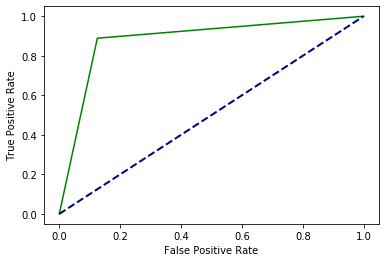

In [16]:
# enter solution here

import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(false_positive_rate_gNB, true_positive_rate_gNB, color='green' )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

This classifier is better than random since the ROC curve is above the navy line.

### 4.D.3 Comparing ROC Curves

ROC curves with larger area under the curve are better classifiers. To compute area under the curve, we use the ```auc``` in the ```sklearn.metrics``` module.

In [17]:
from sklearn.metrics import auc

roc_auc_bNB = auc(false_positive_rate_bNB, true_positive_rate_bNB)
roc_auc_bNB

0.9266493055555556

### Exercise 4.D.3: Area under the curve for Gaussian Naive Bayes

Using the ```auc``` function, compute the area under curve for the Gaussian Naive Bayes classifier. Which classifier is better, Gaussian Naive Bayes or Bernoulli Naive Bayes?   

Note I already calculated ```true_positive_rate_gNB``` and ```false_positive_rate_gNB``` above.

In [18]:
# enter solution here
roc_auc_gNB = auc(false_positive_rate_gNB, true_positive_rate_gNB)
roc_auc_gNB

0.8819444444444444

The Bernoulli Naive Bayes classifier is better.

### 4.D.4 Visualizing the results

We can combine the results of sections 4.C.2, ROC plots, and 4.C.3, AUC calculations, into one plot.


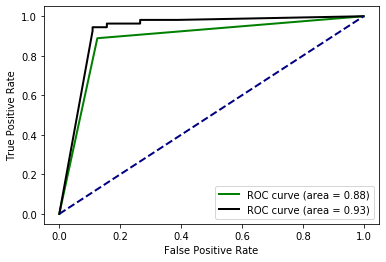

In [19]:
plt.figure()
lw = 2
plt.plot(false_positive_rate_gNB, true_positive_rate_gNB, color='green',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_gNB)
plt.plot(false_positive_rate_bNB, true_positive_rate_bNB, color='black',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_bNB)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# 5. Possible Improvements

Recall that all Naive Bayes algorithms assumes each that the value of any feature is independent of any other feature. In our case, the presence of a segment of the genome does not affect the presence of another segment.

This assumption is not true. The sequence at a given location of the genome can determine a sequence at another location. Thus, features are not truly independent. While Naive Bayes classifiers do not allow interaction between features, there are classifiers that do.


Logistic regression, linear discriminant analysis (LDA) and quadratic discriminant analysis (QDA) allow for interaction. However, LDA and QDA assume that probability that a feature takes on a given value is Gaussian. Logistic regression does not make assumption of a probability distribution. However, you would have to tell the logistic regression what interactions to consider. Doing logistic regression with all interactions terms and some penalty, like LASSO, might be suitable.

The methods have discussed so far all parameteric classifiers. Parameteric techniques learn parameters, such mean and variance in the Gaussian Naive Bayes and $p$ values in Bernoulli Naive Bayes. The parameters are used in a formula to compute the probability. There exist non-parametric classifiers. 

Non-parametric do not have formulas to calculate the probability to fall into a given class. Non-parametric methods instead use an algorithm to learn the data structure. Non-parametric methods are more flexible than parametric techniques. However, nonparametric methods are sometimes less interpretable than paramatric methods.   Given the complexity of this problem, classification trees or K-Nearest Neighbour classifier are suitable alternatives.